In [41]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams['font.family'] = ['Trebuchet MS']
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [63]:
abgrid_long = pd.read_excel("./analysis/abgrid_long.xlsx")
abgrid_wide = pd.read_excel("./analysis/abgrid_wide.xlsx")
safa_anx =  pd.read_excel("./analysis/safa_anx.xlsx")
mmpia = pd.read_excel("./analysis/mmpia.xlsx")

## ABGRID

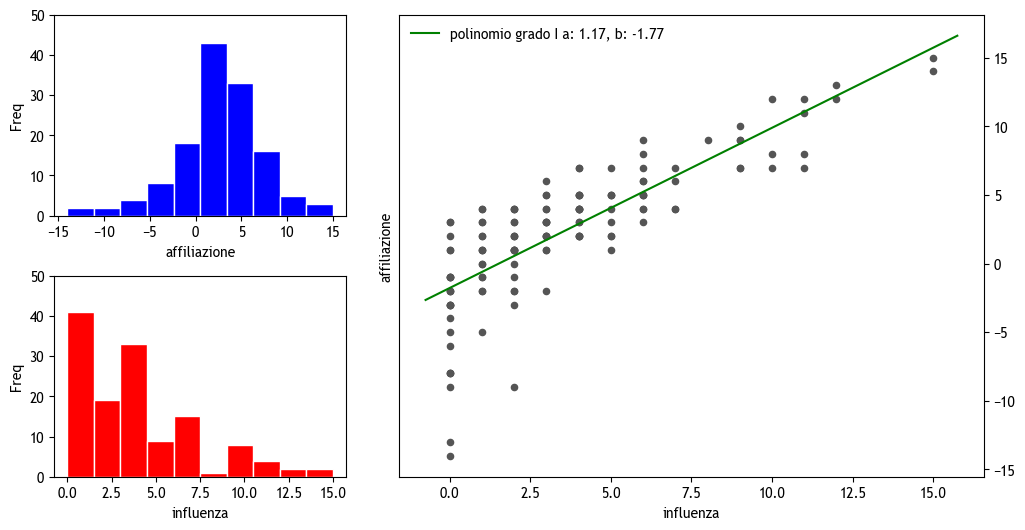

In [6]:
fig = plt.figure(figsize=(12,6))

AFF = "affiliation_coeff_raw"
INF = "influence_coeff_raw"

gs = GridSpec(nrows=2, ncols=2, width_ratios=[1,2], hspace=.3, wspace=.12)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

abgrid_long[AFF].plot.hist(ax=ax1, color="#00F", ec='#FFF')
ax1.set_xlabel("affiliazione")

abgrid_long[INF].plot.hist(ax=ax2, color="#F00", ec='#FFF')
ax2.set_xlabel("influenza")

for ax in (ax1, ax2):
    ax.set_ylabel("Freq")
    ax.set_ylim(0,50)


abgrid_long.plot.scatter(x=INF, y=AFF, color="#555555",  ax=ax3)

coefficients = np.polyfit(abgrid_long[INF], abgrid_long[AFF], 1)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(ax3.get_xlim()[0], ax3.get_xlim()[1], abgrid_long[INF].shape[0])
y_line = polynomial(x_line)

ax3.plot(x_line, y_line, color='green', label=f'polinomio grado I a: {coefficients[0].round(2) }, b: {coefficients[1].round(2)}')

ax3.yaxis.tick_right()
ax3.set_xlabel("influenza")
ax3.set_ylabel("affiliazione")
ax3.legend(frameon=False);
fig.savefig("./analysis/aff_inf.png", bbox_inches='tight')

In [27]:
numeric_cols = [c for c in abgrid_long.select_dtypes("number").columns if c not in ["nd_a", "nd_b"]]

abgrid_wide_multi_index = abgrid_long.pivot(index="id", columns=["anno", "contesto"])[numeric_cols]
idx = pd.IndexSlice

abgrid_wide_i = abgrid_wide.set_index("id").filter(regex=r"^(?!lettera)[a-zA-Z_]+_i\b")
abgrid_wide_i

,ic_a_lud_i,ic_a_stu_i,pr_a_lud_i,pr_a_stu_i,bt_a_lud_i,bt_a_stu_i,cl_a_lud_i,cl_a_stu_i,hu_a_lud_i,hu_a_stu_i,nd_a_lud_i,nd_a_stu_i,ic_b_lud_i,ic_b_stu_i,pr_b_lud_i,pr_b_stu_i,bt_b_lud_i,bt_b_stu_i,cl_b_lud_i,cl_b_stu_i,hu_b_lud_i,hu_b_stu_i,nd_b_lud_i,nd_b_stu_i,received_preferences_lud_i,received_preferences_stu_i,received_rejections_lud_i,received_rejections_stu_i,given_preferences_lud_i,given_preferences_stu_i,given_rejections_lud_i,given_rejections_stu_i,mutual_preferences_lud_i,mutual_preferences_stu_i,mutual_rejections_lud_i,mutual_rejections_stu_i,balance_lud_i,balance_stu_i,orientation_lud_i,orientation_stu_i,impact_lud_i,impact_stu_i,affiliation_coeff_raw_lud_i,affiliation_coeff_raw_stu_i,influence_coeff_raw_lud_i,influence_coeff_raw_stu_i,affiliation_coeff_lud_i,affiliation_coeff_stu_i,influence_coeff_lud_i,influence_coeff_stu_i,status_lud_i,status_stu_i
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abbamondi mario,0.081081,0.000000,0.042997,0.004934,0.011887,0.000000,0.303332,0.000000,5.391065e-02,0.017801,0,1,0.054054,0.054054,0.018422,0.017352,0.014264,0.008258,0.054054,0.054054,0.048975,0.057605,0,0,3,0,2,2,3,3,3,3,2,0,0,0,1,-2,0,0,5,2,1,-2,5,0,97.971054,92.250230,104.019421,92.453141,controversial,underrated
albanese michelle,0.027027,0.027027,0.009828,0.042179,0.021396,0.141479,0.061776,0.335949,1.564969e-02,0.019750,0,0,0.000000,0.027027,0.008635,0.029406,0.000000,0.005255,0.000000,0.204247,0.032719,0.081605,1,0,1,1,0,1,3,3,3,3,1,0,0,1,1,0,0,0,1,2,1,0,2,1,97.971054,95.977967,93.605466,94.946886,neglected,underrated
bagatin giulio,0.081081,0.054054,0.027810,0.011243,0.050075,0.014802,0.284029,0.202878,8.061685e-02,0.025469,0,0,0.000000,0.000000,0.008635,0.011076,0.000000,0.000000,0.000000,0.000000,0.047432,0.018157,1,1,3,2,0,0,3,3,3,3,0,0,0,0,3,2,0,0,3,2,3,2,3,2,101.826052,99.705705,97.076785,97.440630,-,underrated
bonfanti francesca,0.027027,0.378378,0.013109,0.051730,0.017267,0.091629,0.027027,0.395484,5.961641e-03,0.042549,0,0,0.000000,0.027027,0.008635,0.015355,0.000000,0.000751,0.000000,0.040541,0.000000,0.001682,3,0,1,14,0,1,3,3,0,2,1,1,0,0,1,13,3,1,1,15,4,14,2,15,103.753551,122.072130,93.605466,129.859311,neglected,popular
ciliento giacomo pio,0.135135,0.081081,0.040211,0.038719,0.050663,0.022472,0.284029,0.343332,1.966782e-02,0.039374,0,0,0.000000,0.000000,0.008635,0.011076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3,5,3,0,0,3,3,0,0,1,0,0,0,5,3,3,3,5,3,8,6,6,3,111.463546,107.161180,107.490740,99.934375,-,-
cimini flaminia,0.108108,0.027027,0.015701,0.016886,0.024750,0.051076,0.108108,0.249946,5.922577e-03,0.015340,0,0,0.000000,0.081081,0.008635,0.034757,0.000000,0.025526,0.000000,0.180978,0.048975,0.057605,1,0,4,1,0,3,3,3,3,3,2,0,0,0,4,-2,0,0,4,4,4,-2,6,1,103.753551,92.250230,107.490740,94.946886,-,-
criscuolo lorenzo,0.081081,0.027027,0.043024,0.006333,0.078453,0.008121,0.291993,0.027027,2.438265e-02,0.046728,0,0,0.000000,0.000000,0.008635,0.011076,0.000000,0.000000,0.000000,0.000000,0.001109,0.008838,1,1,3,1,0,0,3,3,1,1,2,0,0,0,3,1,2,2,3,1,5,3,5,1,105.681049,101.569574,104.019421,94.946886,-,underrated
cristiano asia assunta,0.000000,0.000000,0.005379,0.004934,0.000000,0.000000,0.000000,0.000000,7.033486e-03,0.022593,1,1,0.378378,0.216216,0.147064,0.104744,0.102102,0.145445,0.469219,0.357432,0.028413,0.023587,0,0,0,0,14,8,3,3,3,3,0,0,3,0,-14,-8,0,0,14,8,-14,-8,0,0,69.058570,81.067017,86.662829,92.453141,rejected,rejected
dalla nave eleonora,0.054054,0.027027,0.012343,0.009718,0.007245,0.005493,0.072072,0.201569,8.349340e-03,0.011464,0,0,0.000000,0.000000,0.008635,0.011076,0.000000,0.000000,0.000000,0.000000,0.033063,0.011367,1,1,2,1,0,0,3,3,1,1,2,0,0,0,2,1,2,2,2,1,4,3,4,1,103.753551,101.569574,100.548103,94.946886,underrated,underrated


In [64]:
mmpia = mmpia.sort_values(by="id").set_index("id")

In [68]:
(
    abgrid_wide_i.loc[:,["influence_coeff_raw_lud_i", "affiliation_coeff_raw_lud_i"]]
        .merge(mmpia.filter(regex="_t"), left_index=True, right_index=True)
        .groupby(abgrid_wide_i["affiliation_coeff_raw_lud_i"] > abgrid_wide_i["affiliation_coeff_raw_lud_i"].mean())
        .mean()
        .T
        .style
            .format(precision=1)
)

affiliation_coeff_raw_lud_i,False,True
influence_coeff_raw_lud_i,1.3,5.7
affiliation_coeff_raw_lud_i,-2.7,5.4
VRIN_scale_t,38.2,40.5
TRIN_scale_t,57.5,59.9
F1_scale_t,40.5,39.9
F2_scale_t,39.5,38.8
F_scale_t,38.3,37.8
L_scale_t,66.5,65.0
K_scale_t,71.2,68.7
Hs_scale_t,36.3,35.6
